<a href="https://colab.research.google.com/github/srutiii/Machine-Learning-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improting Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Uploading CSV file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


**Data collection and Preprocessing**


In [ ]:
# reading the dataset
gold_dataset = pd.read_csv('/content/gld_price_data.csv')


In [ ]:
# to view first 5 rows of the dataset
# gold_dataset.head()

# to view all the column names
gold_dataset.columns

# to get some information and description of the dataset.
# gold_dataset.info()
# gold_dataset.describe()

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
# check for missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#finding correlations.

correlation = gold_dataset.corr(numeric_only=True)

<Axes: >

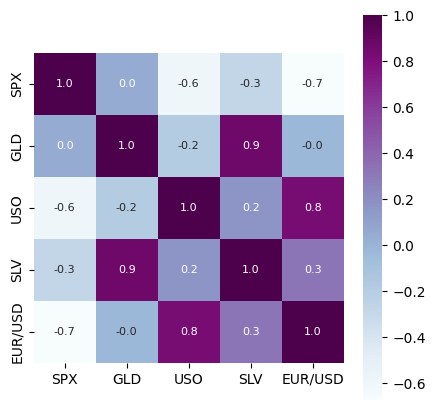

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='BuPu' )

In [ ]:
# printing correlation values.
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

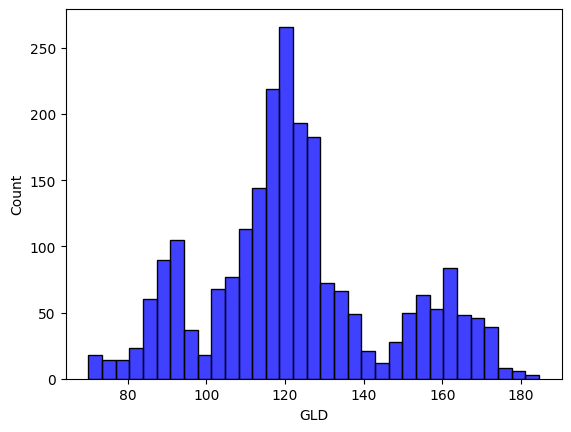

In [ ]:
# price distribution.
sns.histplot(gold_dataset['GLD'],  color='Blue')

**Spliting the features and target**

In [ ]:
X = gold_dataset.drop(['Date', 'GLD'], axis=1)
y = gold_dataset['GLD']

**Spliting the dataset into test and train.**

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Model Training**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training
regressor.fit(X_train, y_train)

RandomForestRegressor()

**Model Evaluation**

In [ ]:
test_predictions = regressor.predict(X_test)

In [ ]:
y_test = list(y_test)

In [ ]:
# R squared error.
error_score = metrics.r2_score(y_test, test_predictions)
print(error_score)

0.9888018986273072


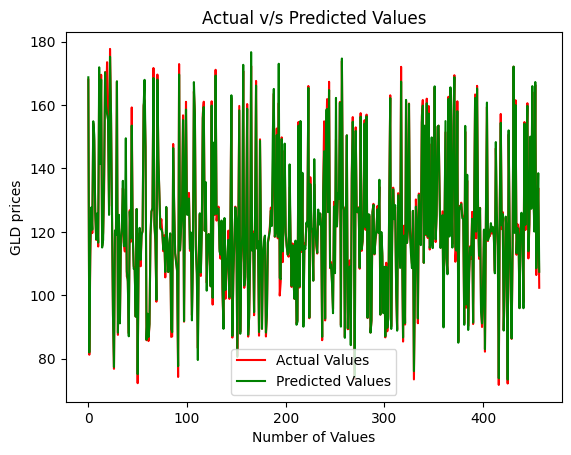

In [ ]:
plt.plot(y_test, color='Red', label='Actual Values')
plt.plot(test_predictions, color='Green', label='Predicted Values')
plt.title("Actual v/s Predicted Values")
plt.xlabel('Number of Values')
plt.ylabel('GLD prices')
plt.legend()
plt.show()